# StyleCheck Experiment Data Analysis

## Setup

In [1]:
%matplotlib inline

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

#Style
plt.style.use('ggplot')
#print(plt.style.available)

# Make the tables look prettier
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
img_folder = "/Users/Dani/Documents/Courses/MLT/12-Master-Thesis/off-with-their-heads/img/"

## Imports

In [4]:
# Imports
final = pd.read_csv('final.csv', sep=";", decimal=",", index_col="id")
trans = pd.read_csv('translations.csv', sep=";", decimal=",")
trans_text = pd.read_csv('translations_text.csv', sep=";", decimal=",")

# Setup speed data
trans["Speed (words/hour)"] = (trans.words * 3600) / trans.time
trans_text["Perceived speed (words/hour)"] = (trans_text.words * 3600) / trans_text.perceived
trans_text["Real speed (words/hour)"] = (trans_text.words * 3600) / trans_text.real
trans_text.BLEU = trans_text.BLEU.astype(float)
#trans["Perceived Speed (Words/hour)"] = (trans.words * 3600) / trans.perception

# Create categorial data and order it
setups = ["SCRATCH", "PE", "STYLE"]
texts = ["AI", "CHARLOTTE", "GARFIELD"]
speed_types = ["REAL", "PERCEIVED"]
participants = [421, 423, 424, 425, 427, 428, 429, 430, 432]

def setup_categorial(column, categories):
    return column.str.upper().astype("category", categories=categories, ordered=True)

add_setups = lambda col: setup_categorial(col, setups)
add_texts = lambda col: setup_categorial(col, texts)
add_speeds = lambda col: setup_categorial(col, speed_types)

    
trans.setup = add_setups(trans.setup)
trans.text = add_texts(trans.text)
trans.type = add_speeds(trans.type)
trans.id = trans.id.astype("category", categories=participants, ordered=True)

trans_text.setup = add_setups(trans_text.setup)
trans_text.text = add_texts(trans_text.text)
trans_text.id = trans_text.id.astype("category", categories=participants, ordered=True)

# Easy column names
speed = "Speed (words/hour)"
per_speed = "Perceived speed (words/hour)"
real_speed = "Real speed (words/hour)"

In [6]:
def sns_style(h=6, w=12):
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.6)
    plt.figure(figsize=(w, h))

### Translation statistics

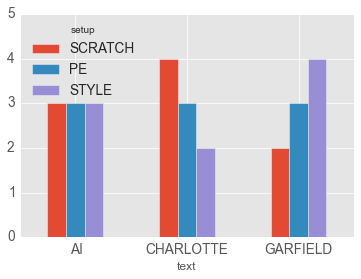

In [47]:
# Number of translations per text and setup

t = trans_text.groupby(["text", "setup"]).size()
t.unstack("setup").plot(kind="bar", ylim=(0,5), rot="horizontal")

### Time

We take the time spent translating from scratch and compare it to the time spent in the PE and STYLE setups. Most participants experience the same effect (either a slowing down or a speeding up) for both the PE and STYLE setups. 

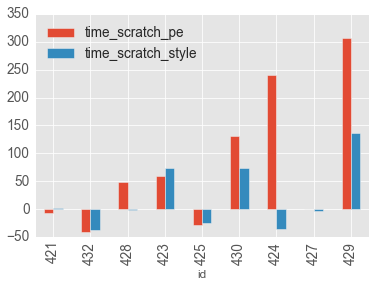

In [48]:
final[['time_scratch_pe', 'time_scratch_style']].plot(kind="bar")# ; plt.axhline(0, color='k')

***

## Did their perceived translation speed vary significantly from their real translation speed? [Questions 11, 17, 25]

From the graphs below it seems 

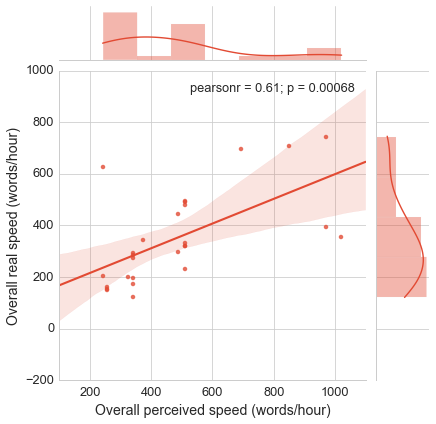

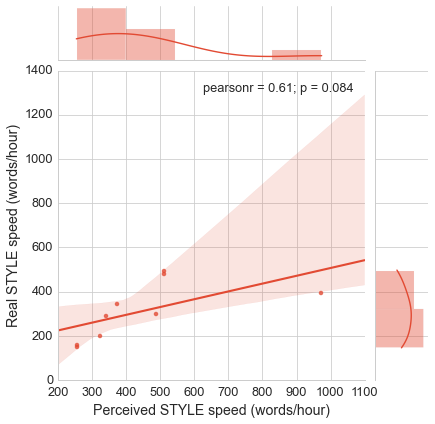

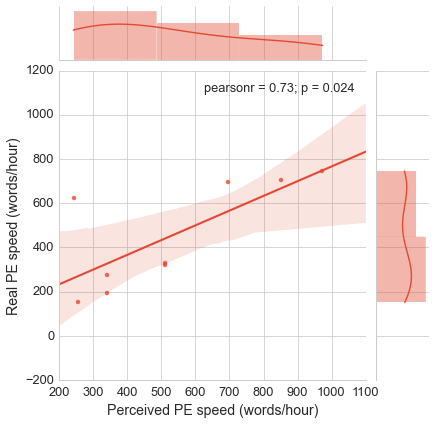

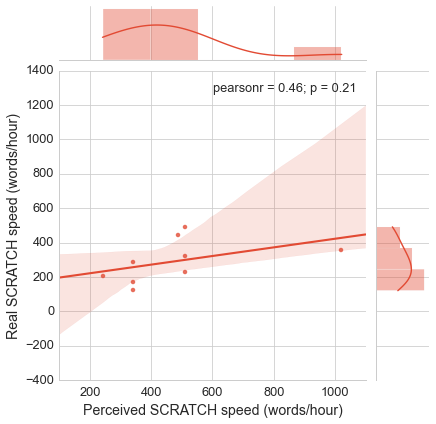

In [51]:
st = sns.jointplot(per_speed, real_speed, trans_text, kind="reg")
st.set_axis_labels("Overall perceived speed (words/hour)", "Overall real speed (words/hour)")


st = sns.jointplot(per_speed, real_speed, trans_text[trans_text.setup == "STYLE"], kind="reg")
st.set_axis_labels("Perceived STYLE speed (words/hour)", "Real STYLE speed (words/hour)")

st = sns.jointplot(per_speed, real_speed, trans_text[trans_text.setup == "PE"], kind="reg")
st.set_axis_labels("Perceived PE speed (words/hour)", "Real PE speed (words/hour)")

st = sns.jointplot(per_speed, real_speed, trans_text[trans_text.setup == "SCRATCH"], kind="reg")
st.set_axis_labels("Perceived SCRATCH speed (words/hour)", "Real SCRATCH speed (words/hour)")

Some participants were good at calculating their own speed, other were not:

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


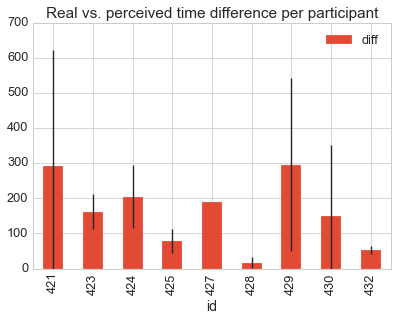

In [52]:
p = trans_text[["id", real_speed, per_speed]]
p["diff"] = abs(p[real_speed] - p[per_speed])
p = p[["id", "diff"]].groupby(["id"])
p_mean = p.mean()
p_err = p.std()

p = p_mean.plot(kind="bar", yerr=p_err, ylim=(0,700))
p.set_title("Real vs. perceived time difference per participant")

### Overall Speed

Overall, the translators translated fastest in the PE setup. The SCRATCH and STYLE setups performed similarly, albeit slightly slower than PE. This is in-line with previous findings.

Despite these results, individual translator variation must be taken into account. The boxplot in Figure X shows the average of the three translations each translator carried out. While some presented little variation, others showed a notable difference in speed depending on the setup or text they were translating. This follows what XXX found.

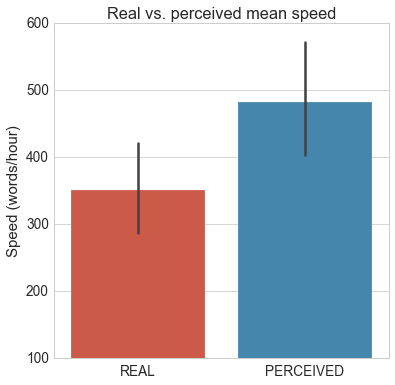

In [54]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.7)
plt.figure(figsize=(6, 6))

ll = sns.barplot(x="type", y=speed, data=trans, ci=95, n_boot=20000)
ll.set_title("Real vs. perceived mean speed")
ll.set_xlabel("")
ll.set_ylabel("Speed (words/hour)")
ll.set_ylim(100,600)

plt.savefig("/".join([img_folder, "time/time_overall.pdf"]), format="pdf")

### Variability among participants

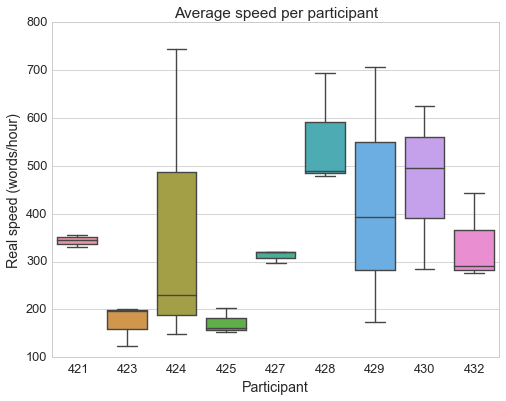

In [56]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.6)
plt.figure(figsize=(8, 6))

ll = sns.boxplot(x="id", y=speed, data=trans[trans.type == "REAL"])#, ci=95, n_boot=20000)
ll.set_title("Average speed per participant")
ll.set_xlabel("Participant")
ll.set_ylabel("Real speed (words/hour)")
ll.set_ylim(100,800)

plt.savefig("/".join([img_folder, "time/time_box_participant.pdf"]), format="pdf")

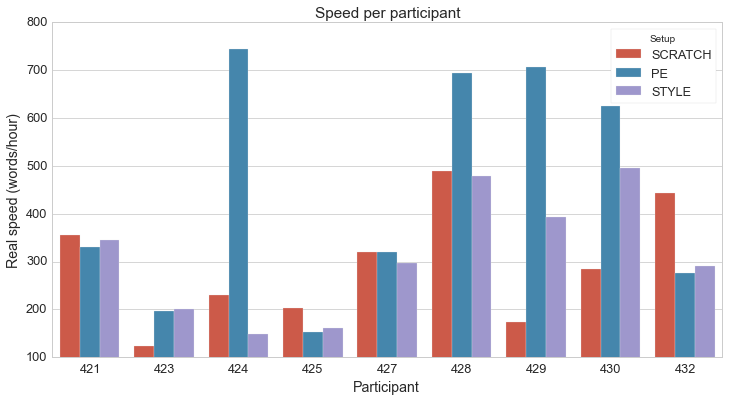

In [57]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.6)
plt.figure(figsize=(12, 6))

ll = sns.barplot(x="id", y=speed, hue="setup", data=trans[trans.type == "REAL"])
ll.set_title("Speed per participant")
ll.set_xlabel("Participant")
ll.set_ylabel("Real speed (words/hour)")
ll.set_ylim(100,800)
plt.legend(title="Setup", frameon=True)

plt.savefig("/".join([img_folder, "time/time_speed_participant.pdf"]), format="pdf")

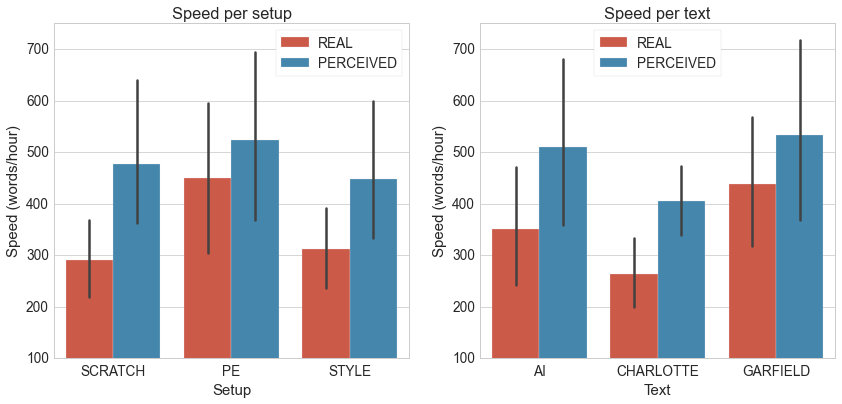

In [87]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.7)

fig, axs = plt.subplots(1,2)
fig.set_size_inches(14,6)

st = sns.barplot(x="setup", y=speed, hue="type", data=trans, ci=95, n_boot=20000, ax=axs[0])
st.set_title("Speed per setup")
st.set_xlabel("Setup")
st.set_ylabel("Speed (words/hour)")
st.set_ylim(100,750)
axs[0].legend(title="", frameon=True)

st = sns.barplot(x="text", y=speed, data=trans, hue="type", ci=95, n_boot=20000, ax=axs[1])
st.set_title("Speed per text")
st.set_xlabel("Text")
st.set_ylabel("Speed (words/hour)")
st.set_ylim(100,750)
plt.legend(title="", frameon=True, loc=9)

plt.savefig("/".join([img_folder, "time/time_real_vs_perceived.pdf"]), format="pdf")

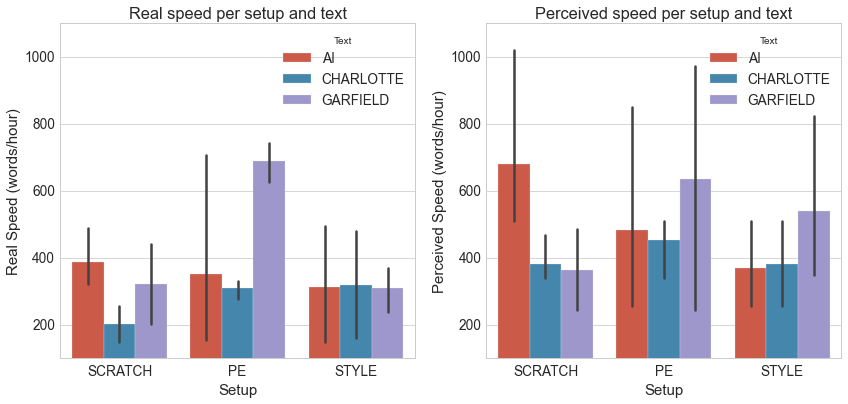

In [59]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(14,6)

f = trans[trans.type == "REAL"]
st = sns.barplot(x="setup", y=speed, hue="text", data=f, ci=95, n_boot=20000, ax=axs[0])
st.set_title("Real speed per setup and text")
st.set_xlabel("Setup")
st.set_ylabel("Real Speed (words/hour)")
st.set_ylim(100,1100)
axs[0].legend(title="Text")

f = trans[trans.type == "PERCEIVED"]
tt = sns.barplot(x="setup", y=speed, hue="text", data=f, ci=95, n_boot=20000, ax=axs[1])
tt.set_title("Perceived speed per setup and text")
tt.set_xlabel("Setup")
tt.set_ylabel("Perceived Speed (words/hour)")
tt.set_ylim(100,1100)
plt.legend(title="Text")

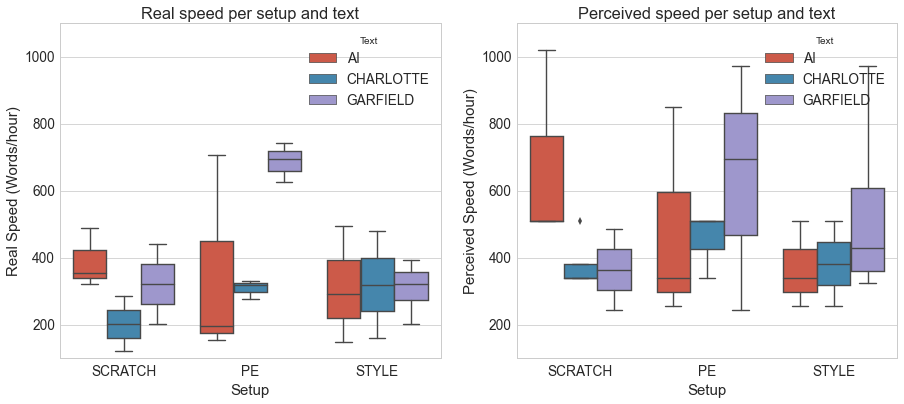

In [60]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15,6)

f = trans[trans.type == "REAL"]
st = sns.boxplot(x="setup", y=speed, hue="text", data=f, ax=axs[0])
st.set_ylim(100,1100)
st.set_title("Real speed per setup and text")
st.set_xlabel("Setup")
st.set_ylabel("Real Speed (Words/hour)")
axs[0].legend(title="Text")

f = trans[trans.type == "PERCEIVED"]
st = sns.boxplot(x="setup", y=speed, hue="text", data=f, ax=axs[1])
st.set_ylim(100,1100)
st.set_title("Perceived speed per setup and text")
st.set_xlabel("Setup")
st.set_ylabel("Perceived Speed (Words/hour)")
axs[1].legend(title="Text")

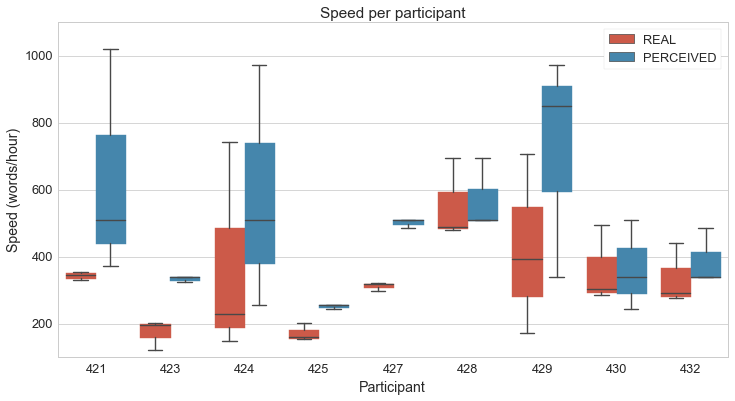

In [193]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.6)
plt.figure(figsize=(12, 6))

ll = sns.boxplot(x="id", y=speed, hue="type", data=trans)#, ci=95, n_boot=20000)
ll.set_title("Speed per participant")
ll.set_xlabel("Participant")
ll.set_ylabel("Speed (words/hour)")
ll.set_ylim(100,1100)
plt.legend(title="", frameon=True)

#plt.savefig("/".join([img_folder, "time/time_2.pdf"]), format="pdf")

### Setup and text variation

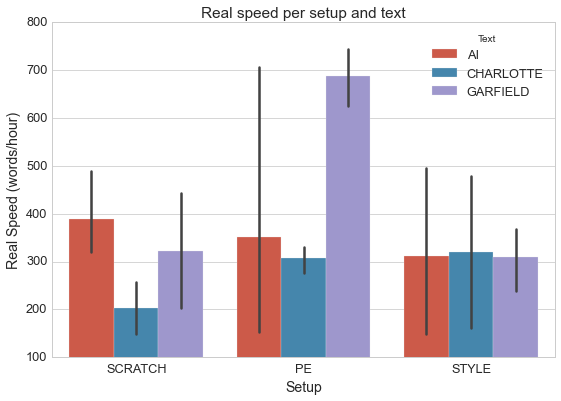

In [84]:
sns_style(w=9)
f = trans[trans.type == "REAL"]
st = sns.barplot(x="setup", y=speed, hue="text", data=f, ci=95, n_boot=20000)
st.set_title("Real speed per setup and text")
st.set_xlabel("Setup")
st.set_ylabel("Real Speed (words/hour)")
st.set_ylim(100,800)
plt.legend(title="Text")
plt.savefig("/".join([img_folder, "time/time_real_ts.pdf"]), format="pdf")

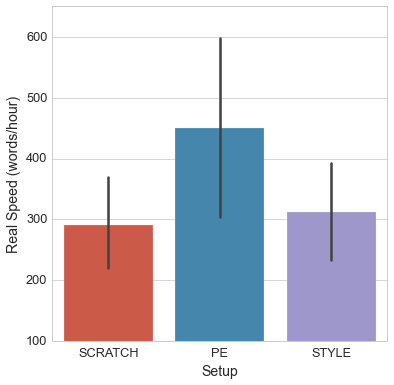

In [80]:
sns_style(w=6)
f = trans[trans.type == "REAL"]
st = sns.barplot(x="setup", y=speed, data=f, ci=95, n_boot=20000)
#st.set_title("Real speed per setup")
st.set_xlabel("Setup")
st.set_ylabel("Real Speed (words/hour)")
st.set_ylim(100,650)
plt.savefig("/".join([img_folder, "time/time_real_setup.pdf"]), format="pdf")

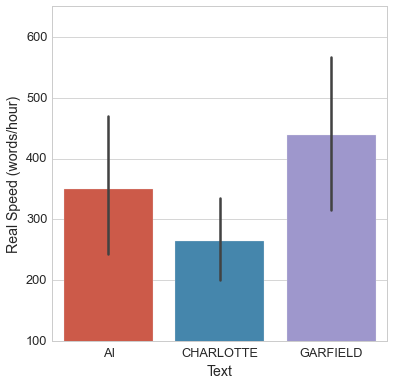

In [81]:
sns_style(w=6)
f = trans[trans.type == "REAL"]
st = sns.barplot(x="text", y=speed, data=f, ci=95, n_boot=20000)
#st.set_title("Real speed per text")
st.set_xlabel("Text")
st.set_ylabel("Real Speed (words/hour)")
st.set_ylim(100,650)
plt.savefig("/".join([img_folder, "time/time_real_text.pdf"]), format="pdf")

### Postediting speed and BLEU score correlation

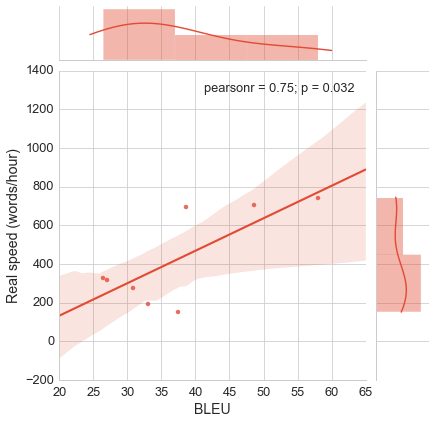

In [57]:
# Excluding 430 as the outlier
# Including it resulted in r = 0.39
sns_style()
st = sns.jointplot("BLEU", real_speed, trans_text[(trans_text.setup == "PE") & (trans_text.id != 430)], kind="reg")
plt.savefig("/".join([img_folder, "time/time_real_bleu.pdf"]), format="pdf")

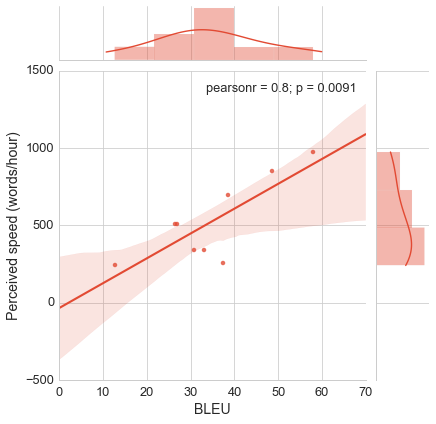

In [93]:
sns_style()
st = sns.jointplot("BLEU", per_speed, trans_text[(trans_text.setup == "PE")], kind="reg")
plt.savefig("/".join([img_folder, "time/time_perceived_bleu.pdf"]), format="pdf")

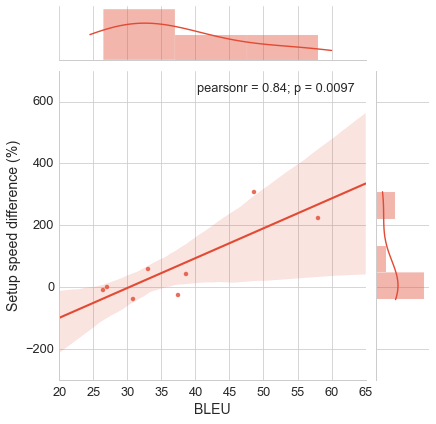

In [56]:
# Correlation between the speed difference Scratch-PE and BLEU scores
# Without deleting 430, r = 0.56, p = 0.12

pe = trans_text[(trans_text.setup == "PE")].set_index("id")[real_speed]
scratch = trans_text[(trans_text.setup == "SCRATCH")].set_index("id")[real_speed]

sns_style()
a = pd.DataFrame()
a["Setup speed difference (%)"] = -(100 - (100 * pe) / scratch)
a["BLEU"] = trans_text[(trans_text.setup == "PE") & (trans_text.id != 430)].set_index("id")["BLEU"]
st = sns.jointplot("BLEU", "Setup speed difference (%)", a, kind="reg")
plt.savefig("/".join([img_folder, "time/time_diff_bleu.pdf"]), format="pdf")